In [1]:
import io
import requests

from PIL import Image as im

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

In [2]:
import pandas as pd

pdf = pd.read_parquet('../../ftransfer_ztf_2024-02-01_689626')


In [ ]:
pdf

In [10]:
Id = pdf['objectId'][1]

id_plus_repete = pdf['objectId'].value_counts().idxmax()


pdf_selectionne = pdf.loc[pdf['objectId'] == id_plus_repete]

pdf_selectionne #= pdf['prv_candidates'][0]

,candid,schemavsn,publisher,objectId,candidate,prv_candidates,cutoutScience,cutoutTemplate,cutoutDifference,cdsxmatch,...,fink_broker_version,fink_science_version,timestamp,year,month,day,tnsclass,lc_features_g,lc_features_r,finkclass
9095,1356463051915015005,3.3,Fink,ZTF18adbmoft,"{'aimage': 0.6380000114440918, 'aimagerat': 0....","[{'aimage': None, 'aimagerat': None, 'bimage':...",{'fileName': 'candid1356463051915015005_pid135...,{'fileName': 'candid1356463051915015005_ref.fi...,{'fileName': 'candid1356463051915015005_pid135...,Candidate_YSO,...,1.4,0.5.1,2020-09-18 11:06:48.003835,2020,9,18,Unknown,"{'amplitude': 0.3285503387451172, 'anderson_da...","{'amplitude': None, 'anderson_darling_normal':...",Candidate_YSO
9096,1356452581915015002,3.3,Fink,ZTF18adbmoft,"{'aimage': 0.7609999775886536, 'aimagerat': 0....","[{'aimage': None, 'aimagerat': None, 'bimage':...",{'fileName': 'candid1356452581915015002_pid135...,{'fileName': 'candid1356452581915015002_ref.fi...,{'fileName': 'candid1356452581915015002_pid135...,Candidate_YSO,...,1.4,0.5.1,2020-09-18 10:51:42.998404,2020,9,18,Unknown,"{'amplitude': 0.3285503387451172, 'anderson_da...","{'amplitude': None, 'anderson_darling_normal':...",Candidate_YSO
9142,1356506493015015010,3.3,Fink,ZTF18adbmoft,"{'aimage': 0.8410000205039978, 'aimagerat': 0....","[{'aimage': 0.8339999914169312, 'aimagerat': 0...",{'fileName': 'candid1356506493015015010_pid135...,{'fileName': 'candid1356506493015015010_ref.fi...,{'fileName': 'candid1356506493015015010_pid135...,Candidate_YSO,...,1.4,0.5.1,2020-09-18 12:09:21.003837,2020,9,18,Unknown,"{'amplitude': 0.30609989166259766, 'anderson_d...","{'amplitude': None, 'anderson_darling_normal':...",Candidate_YSO
9143,1356526941915015002,3.3,Fink,ZTF18adbmoft,"{'aimage': 0.8320000171661377, 'aimagerat': 0....","[{'aimage': 0.8339999914169312, 'aimagerat': 0...",{'fileName': 'candid1356526941915015002_pid135...,{'fileName': 'candid1356526941915015002_ref.fi...,{'fileName': 'candid1356526941915015002_pid135...,Candidate_YSO,...,1.4,0.5.1,2020-09-18 12:38:47.996144,2020,9,18,Unknown,"{'amplitude': 0.30609989166259766, 'anderson_d...","{'amplitude': None, 'anderson_darling_normal':...",Candidate_YSO
9212,1356527403015015001,3.3,Fink,ZTF18adbmoft,"{'aimage': 0.800000011920929, 'aimagerat': 0.3...","[{'aimage': 0.8339999914169312, 'aimagerat': 0...",{'fileName': 'candid1356527403015015001_pid135...,{'fileName': 'candid1356527403015015001_ref.fi...,{'fileName': 'candid1356527403015015001_pid135...,Candidate_YSO,...,1.4,0.5.1,2020-09-18 12:39:27.999347,2020,9,18,Unknown,"{'amplitude': 0.3395366668701172, 'anderson_da...","{'amplitude': None, 'anderson_darling_normal':...",Candidate_YSO
9246,1356489443015015003,3.3,Fink,ZTF18adbmoft,"{'aimage': 1.125, 'aimagerat': 0.3548896014690...","[{'aimage': None, 'aimagerat': None, 'bimage':...",{'fileName': 'candid1356489443015015003_pid135...,{'fileName': 'candid1356489443015015003_ref.fi...,{'fileName': 'candid1356489443015015003_pid135...,Candidate_YSO,...,1.4,0.5.1,2020-09-18 11:44:47.996176,2020,9,18,Unknown,"{'amplitude': 0.30609989166259766, 'anderson_d...","{'amplitude': None, 'anderson_darling_normal':...",Candidate_YSO
9282,1356506961915015002,3.3,Fink,ZTF18adbmoft,"{'aimage': 0.7950000166893005, 'aimagerat': 0....","[{'aimage': 0.8339999914169312, 'aimagerat': 0...",{'fileName': 'candid1356506961915015002_pid135...,{'fileName': 'candid1356506961915015002_ref.fi...,{'fileName': 'candid1356506961915015002_pid135...,Candidate_YSO,...,1.4,0.5.1,2020-09-18 12:10:02.000637,2020,9,18,Unknown,"{'amplitude': 0.30609989166259766, 'anderson_d...","{'amplitude': None, 'anderson_darling_normal':...",Candidate_YSO


In [11]:
# on choisie le dernier mais c'est pratique comme ca ? oui si les donnes sont toujours dans l'ordre cronologique 
# faut faire selon le date ! 
pdf_selectionne = pdf_selectionne.iloc[-1]

In [12]:
pdf_selectionne['objectId']

'ZTF18adbmoft'

In [14]:
# do we need 'candidate' ? the actual  value 
pdf_selectionne_cand = pdf_selectionne['prv_candidates'] 

In [15]:
liste_dicts = list(pdf_selectionne_cand)

df = pd.DataFrame(liste_dicts)

In [16]:
df

,aimage,aimagerat,bimage,bimagerat,candid,chinr,chipsf,classtar,clrcoeff,clrcounc,...,sigmagnr,sigmapsf,sky,ssdistnr,ssmagnr,ssnamenr,sumrat,tblid,xpos,ypos
0,0.834,0.698080,0.788,0.659577,1.327451e+18,0.506,38.930698,0.019,0.089630,0.000006,...,0.018,0.081736,0.174667,None,None,None,0.921578,3.0,264.931000,552.168030
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.067182,0.000014,...,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN
2,1.128,0.484120,1.038,0.445494,1.328446e+18,0.966,1.545020,0.648,-0.041911,0.000025,...,0.019,0.140106,-0.024658,None,None,None,1.000000,1.0,264.778015,522.242004
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.087819,0.000005,...,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN
4,0.915,0.731859,0.835,0.667871,1.329476e+18,0.506,23.880400,0.996,0.091457,0.000006,...,0.018,0.085136,0.029418,None,None,None,1.000000,5.0,283.713013,580.533997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.761,0.645605,0.593,0.503080,1.356453e+18,0.506,47.284599,0.997,0.069252,0.000039,...,0.018,0.077886,-0.403623,None,None,None,1.000000,2.0,235.126999,822.820007
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.080654,0.000035,...,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN
72,0.638,0.254183,0.588,0.234263,1.356463e+18,0.506,42.842602,0.976,0.081411,0.000009,...,0.018,0.078897,0.060207,None,None,None,0.918820,5.0,237.212006,824.260986
73,1.125,0.354890,0.993,0.313249,1.356489e+18,0.564,13.679300,0.748,0.092013,0.000004,...,0.013,0.044373,0.551492,None,None,None,1.000000,3.0,828.994019,853.330017


In [ ]:
mjd = df['jd'].apply(lambda x: x - 2400000.5)
print(mjd[maskBadquality] )

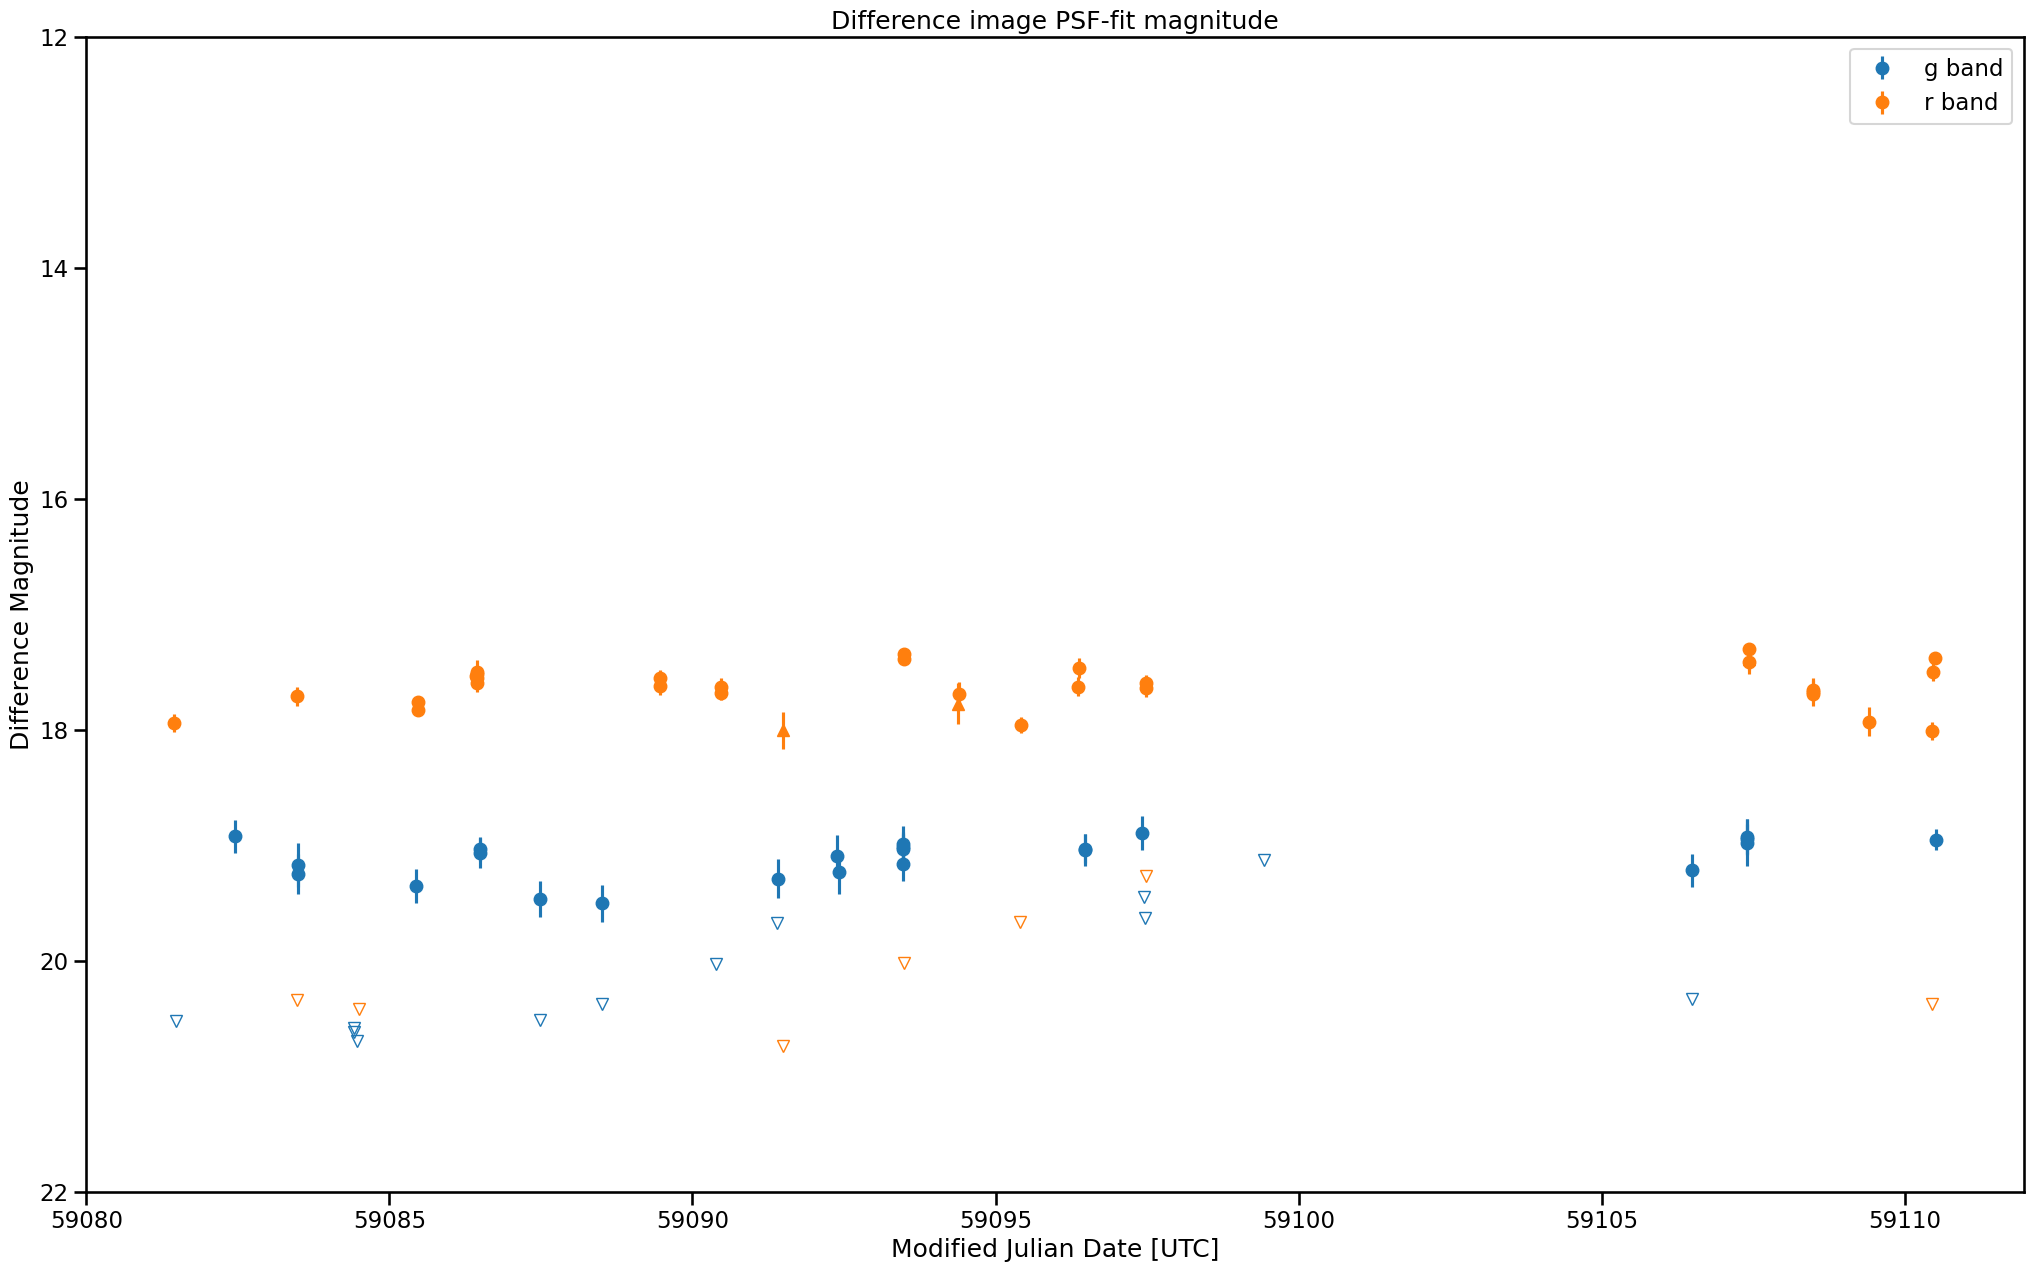

In [17]:

mjd = df['jd'].apply(lambda x: x - 2400000.5)

fig = plt.figure(figsize=(25, 15))

colordic = {1: 'C0', 2: 'C1'}
filtdic = {1: 'g', 2: 'r'}

for filt in np.unique(df['fid']):
    maskFilt = df['fid'] == filt

    # The column `d:tag` is used to check data type
    maskValid = (df['rb'] > 0.55) & (df['nbad'] == 0)
    plt.errorbar(
        df[maskValid & maskFilt]['jd'].apply(lambda x: x - 2400000.5),
        df[maskValid & maskFilt]['magpsf'],
        df[maskValid & maskFilt]['sigmapsf'],
        ls = '', marker='o', color=colordic[filt], label='{} band'.format(filtdic[filt])
    )

    maskUpper = pd.isna(df['magpsf'])
    plt.plot(
        df[maskUpper & maskFilt]['jd'].apply(lambda x: x - 2400000.5),
        df[maskUpper & maskFilt]['diffmaglim'],
        ls='', marker='v', color=colordic[filt], markerfacecolor='none'
    )
    
    maskBadquality = ~maskValid & ~maskUpper ## C'EST PAS VRAI (des valeurs de Upper sont nan ! faut regler Upper)

    plt.errorbar(
        df[maskBadquality & maskFilt]['jd'].apply(lambda x: x - 2400000.5),
        df[maskBadquality & maskFilt]['magpsf'],
        df[maskBadquality & maskFilt]['sigmapsf'],
        ls='', marker='^', color=colordic[filt]
    )

plt.ylim(12, 22)
plt.gca().invert_yaxis()
plt.legend()
plt.title('Difference image PSF-fit magnitude')
plt.xlabel('Modified Julian Date [UTC]')
plt.ylabel('Difference Magnitude');


0        t
1     None
2        t
3     None
4        t
      ... 
70       1
71    None
72       1
73       1
74       1
Name: isdiffpos, Length: 75, dtype: object
0        t
1     None
2        t
3     None
4        t
      ... 
70       1
71    None
72       1
73       1
74       1
Name: isdiffpos, Length: 75, dtype: object


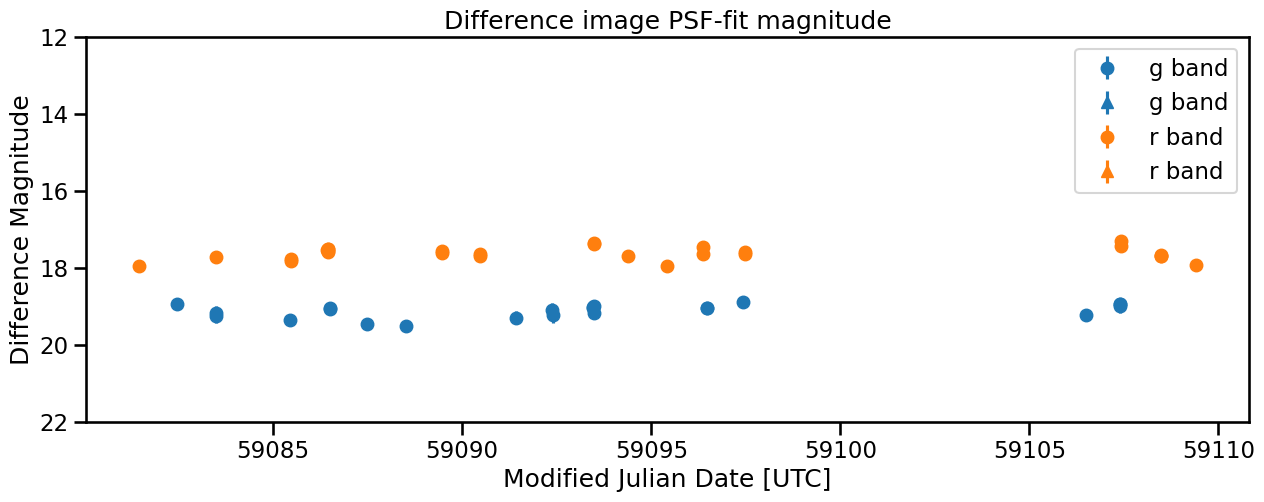

In [18]:

 

fig = plt.figure(figsize=(15, 5))

colordic = {1: 'C0', 2: 'C1'}
filtdic = {1: 'g', 2: 'r'}

for filt in np.unique(df['fid']):
    maskFilt = df['fid'] == filt
    #t or 1 => candidate is from positive (sci minus ref) subtraction;
    #f or 0 => candidate is from negative (ref minus sci) subtraction"
    maskValid = (df['rb'] > 0.55) & (df['nbad'] == 0)
    maskneg = (df['isdiffpos'] == 't') | (df['isdiffpos'] == 1)

    plt.errorbar(
        df[maskValid & maskFilt & maskneg ]['jd'].apply(lambda x: x - 2400000.5),
        df[maskValid & maskFilt & maskneg ]['magpsf'],
        df[maskValid & maskFilt & maskneg ]['sigmapsf'],
        ls = '', marker='o', color=colordic[filt], label='{} band'.format(filtdic[filt])
    )
    maskpos = (df['isdiffpos'] == 'f') | (df['isdiffpos'] == 0)

    plt.errorbar(
        df[maskValid & maskFilt &  maskpos ]['jd'].apply(lambda x: x - 2400000.5),
        df[maskValid & maskFilt &  maskpos ]['magpsf'],
        df[maskValid & maskFilt &  maskpos ]['sigmapsf'],
        ls = '', marker='^', color=colordic[filt], label='{} band'.format(filtdic[filt])
    )
    

plt.ylim(12, 22)
plt.gca().invert_yaxis()
plt.legend()
plt.title('Difference image PSF-fit magnitude')
plt.xlabel('Modified Julian Date [UTC]')
plt.ylabel('Difference Magnitude');



In [19]:
# from fink_science.conversion import dc_mag
from fink_utils.photometry.conversion import dc_mag
from fink_utils.photometry.utils import is_source_behind

# Take only valid measurements
maskValid = (df['rb'] > 0.55) & (df['nbad'] == 0)
df_valid = df[maskValid].sort_values('jd', ascending=False)

isSource = is_source_behind(
    df_valid['distnr'].values[0]
)

if isSource:
    print('It looks like there is a source behind. Lets compute the DC magnitude instead.')
    
    # Use DC magnitude instead of difference mag
    mag_dc, err_dc = np.transpose(
        [
            dc_mag(*args) for args in zip(
                df_valid['magpsf'].astype(float).values,
                df_valid['sigmapsf'].astype(float).values,
                df_valid['magnr'].astype(float).values,
                df_valid['sigmagnr'].astype(float).values,
                df_valid['isdiffpos'].values
            )
        ]
    )
    
    df_valid['mag_dc'] = mag_dc
    df_valid['err_dc'] = err_dc
else:
    print('No source found -- keeping PSF fit magnitude')
    df_valid['mag_dc'] = df_valid['magpsf']
    df_valid['err_dc'] = df_valid['sigmapsf']



It looks like there is a source behind. Lets compute the DC magnitude instead.


15.549999936421711 17.25617400459621


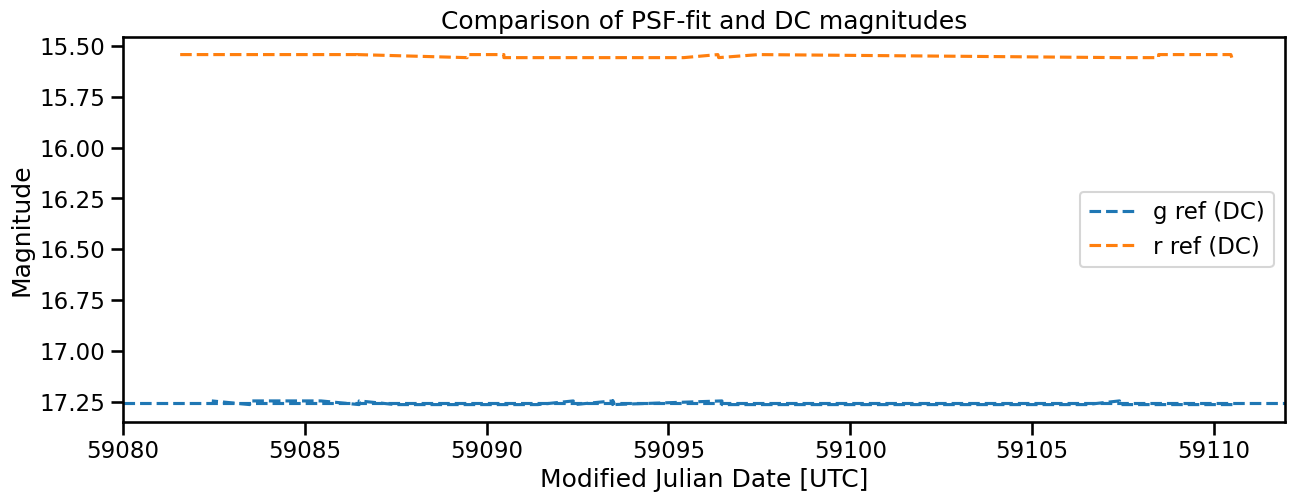

In [20]:
fig = plt.figure(figsize=(15, 5))

colordic = {1: 'C0', 2: 'C1'}
filtdic = {1: 'g', 2: 'r'}

for filt in np.unique(df_valid['fid']):
    maskFilt = df_valid['fid'] == filt

    """plt.errorbar(
        df_valid[maskFilt]['jd'].apply(lambda x: x - 2400000.5),
        df_valid[maskFilt]['magpsf'],
        df_valid[maskFilt]['sigmapsf'],
        ls = '', marker='x', 
        color=colordic[filt], 
        label='{} band (PSF-fit)'.format(filtdic[filt]),
    )"""
    
    
    """plt.errorbar(
        df_valid[maskFilt]['jd'].apply(lambda x: x - 2400000.5),
        df_valid[maskFilt]['mag_dc'],
        df_valid[maskFilt]['err_dc'],
        ls = '', marker='o', 
        color=colordic[filt], 
        label='{} band (DC)'.format(filtdic[filt]),
    )"""
    #pour montrer s'il y a une variance dans la reference 
    plt.errorbar(
        df_valid[maskFilt]['jd'].apply(lambda x: x - 2400000.5),
        df_valid[maskFilt]['magnr'],
        ls = '--', 
        color=colordic[filt], 
        label='{} ref (DC)'.format(filtdic[filt]),
    )
    

ref_r = df_valid['magnr']*(df_valid['fid']==2)

ref_r = (ref_r[ref_r != 0]).mean()

ref_g = df_valid['magnr']*(df_valid['fid']==1)

ref_g = (ref_g[ref_g != 0]).mean()


print(ref_r, ref_g)
# c'est de valeurs moyennes mais sont -ils resonnables ? 
#plt.axhline(y=ref_r, color=colordic[2], linestyle='--')
plt.axhline(y=ref_g, color=colordic[1], linestyle='--')
plt.gca().invert_yaxis()
plt.legend()
plt.title('Comparison of PSF-fit and DC magnitudes')
plt.xlabel('Modified Julian Date [UTC]')
plt.ylabel('Magnitude');

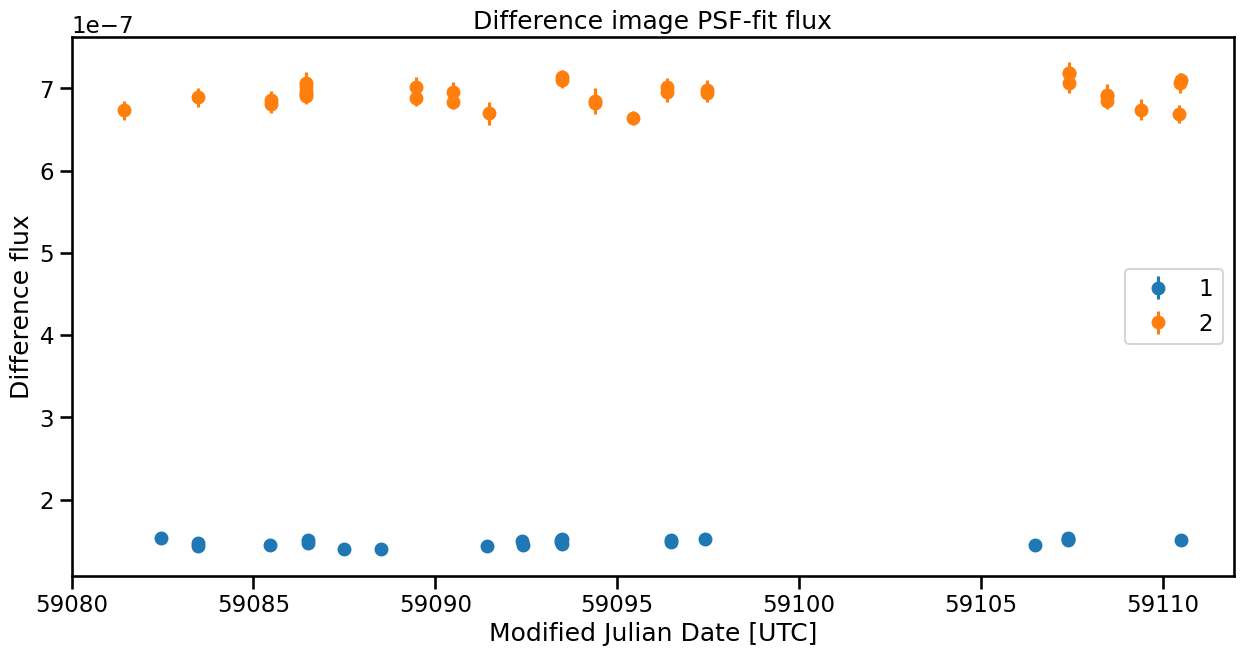

In [36]:
fig = plt.figure(figsize=(15, 7))

from fink_utils.photometry.conversion import apparent_flux


dc_flux, dc_sigflux = np.transpose(
        [
            apparent_flux(*args, jansky=False) for args in zip(
                df['magpsf'].astype(float).values,
                df['sigmapsf'].astype(float).values,
                df['magnr'].astype(float).values,
                df['sigmagnr'].astype(float).values,
                df['isdiffpos'].values
            )
        ]
)

df['dc_flux'] = dc_flux
df['dc_sigflux'] = dc_sigflux


for filt in np.unique(df['fid']):
    mask = df['fid'] == filt
    sub = df[mask]
    plt.errorbar(
        sub['jd'].apply(lambda x: x - 2400000.5),
        sub['dc_flux'], 
        sub['dc_sigflux'], 
        ls='', 
        marker='o',
        label=filt
    )
plt.legend()
plt.title('Difference image PSF-fit flux')
plt.xlabel('Modified Julian Date [UTC]')
plt.ylabel('Difference flux');


In [38]:
df[maskBadquality]['dc_flux']

32    6.694191e-07
43    6.843466e-07
63    7.180609e-07
Name: dc_flux, dtype: float64